In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# c = length

NACA 4-digit symmetrical airfoil
---

In [186]:
naca_id = "3510"#"4415"
t = naca_id[2:]
t = int(t)/100

x = np.linspace(0,1,1000)

y_t = 5 * t *np.array([0.2969 * np.sqrt(x) - 0.1260*x - 0.3526*(x**2) + 0.2843*(x**3) - 0.1015*(x**4)])

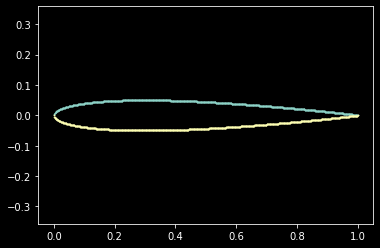

In [187]:
plt.scatter(x,y_t.T,0.5)
plt.scatter(x,-y_t.T,0.5)
plt.axis('equal')
plt.show()

cambered 4-digit foil
---
calculating the camber line

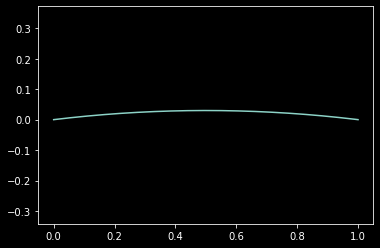

In [188]:
m = float(naca_id[0]) / 100
p = float(naca_id[1]) / 10
c = x[-1] - x[0]

x_0 = x[np.logical_and(x >= 0, x <= p*c)]
x_1 = x[np.logical_and(x >= p*c, x <= c)]
y_c_0 = (m / p**2) * (2 * p * (x_0/c) - (x_0/c)**2)
y_c_1 = (m / ((1-p)**2)) * ((1-2*p) + 2*p*(x_1/c) - (x_1/c)**2)

y_c = np.concatenate([y_c_0, y_c_1])

#plt.figure(figsize=(10,10))
plt.plot(x, y_c)
plt.axis('equal')
plt.show()

thickness perpendicular to the line

(1, 1000) (1, 1000)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


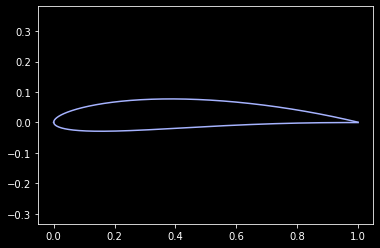

In [189]:
dyc_dx = np.concatenate([2*m/(p**2) * (p-(x_0/c)), 2*m/(1-p**2) * (p - x_1/c)])

theta = np.arctan(dyc_dx)#@(np.diff(y_c), np.diff(x))



x_upper = x - y_c * np.sin(theta)
y_upper = y_c + y_t * np.cos(theta)


x_lower = x + y_t * np.sin(theta)
y_lower = y_c - y_t * np.cos(theta)

print(x_lower.shape, y_lower.shape)
plt.style.use("dark_background")
plt.plot(x_upper, y_upper.T, color=[0.65,0.7,1.])
plt.plot(x_lower.T, y_lower.T,color=[0.65,0.7,1.])
plt.axes()
plt.axis('equal')
plt.show()